In [72]:
import pandas as pd
import numpy as np

In [113]:
X = [i for i in range(1, 8)]
Y = [1.5, 3.8, 6.7, 9.0, 11.2, 13.6, 16]

dataframe = pd.DataFrame(
    data =  {
        "X" : X,
        "Y" : Y
    }
)

28


In [74]:
dataframe

,X,Y
0,1,1.5
1,2,3.8
2,3,6.7
3,4,9.0
4,5,11.2
5,6,13.6
6,7,16.0


In [75]:
dataframe['XY'] = dataframe['X'] * dataframe['Y']
dataframe["X^2"] = dataframe['X'] ** 2

In [76]:
dataframe

,X,Y,XY,X^2
0,1,1.5,1.5,1
1,2,3.8,7.6,4
2,3,6.7,20.1,9
3,4,9.0,36.0,16
4,5,11.2,56.0,25
5,6,13.6,81.6,36
6,7,16.0,112.0,49


In [77]:
n = len(dataframe)
sum_xy = dataframe['XY'].sum()
sum_x = dataframe['X'].sum()
sum_y = dataframe['Y'].sum()
sum_x_2 = dataframe['X^2'].sum()
sum_x_h_2 = sum_x ** 2

$$ m = \frac{n\sum x*y - \sum x\sum y}{n\sum x^{2} - (\sum x)^{2}} $$

In [78]:
'''numerator_m = (n*(sum_xy)) - (sum_x * sum_y)
denominator_m = (n * sum_x_2) - (sum_x_h_2)

numerator_m, denominator_m
m = numerator_m / denominator_m
m'''
class mvalue:
    def __init__(self , n , sum_xy , sum_x , sum_y , sum_x_2 , sum_x_h_2):
        numerator_m = (n*(sum_xy)) - (sum_x * sum_y)
        denominator_m = (n * sum_x_2) - (sum_x_h_2)
    def PrintMvalue(self):
        value = numerator_m/denominator_m
        return value


m = mvalue(n , sum_xy , sum_x , sum_y , sum_x_2 , sum_x_h_2)
m = m.PrintMvalue()
m

2.4142857142857133

$$b = \frac{\sum y - m * \sum x}{n}$$

In [96]:
class bvalue:
    def __init__(self , m , sum_y , sum_x , n):
        self.numerator_b = sum_y - (m * sum_x)
        self.denominator_b = n
    def PrintBvalue(self):
        self.value = self.numerator_b/self.denominator_b 
        return self.value

    
b = bvalue(m , sum_y , sum_x , n)
b = b.PrintBvalue()
b

-0.8285714285714231

$$y_{pred} = m\sum_{i = 1}^{n}X + b $$

In [106]:
class y_pred_Value:
    def __init__(self , m , X , b):
        self.y_pred = [round((m * Xi + b), 2) for Xi in dataframe['X']]
    def PrintYpred(self):
        return self.y_pred


ypred = y_pred_Value(m,X,b)
ypred = ypred.PrintYpred()
ypred

[1.59, 4.0, 6.41, 8.83, 11.24, 13.66, 16.07]

$$squarederror = \sum_{i=0}^{n}  (y_{pred} - y_{org})^{2}$$

In [109]:
class SquaredEr:
    def __init__(self , ypred ,Y):
        self.SE = sum([(y_pred_value - y_org_value) ** 2 
        for y_pred_value, y_org_value in zip(ypred, dataframe['Y'].values)])
    def PrintSquaredError(self):
        return self.SE
    
squared_error = SquaredEr(ypred ,Y)
squared_error = squared_error.PrintSquaredError()
squared_error

0.17120000000000024

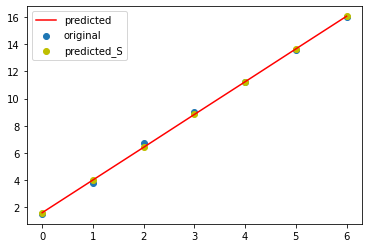

In [118]:
class graph:
    def __init__(self,dataframe,y_pred):
        plt.scatter(list(range(len(dataframe))), dataframe['Y'].values, label="original")
        plt.plot(list(range(len(dataframe))), y_pred, c='r', label="predicted")
        plt.scatter(list(range(len(dataframe))), y_pred, c='y', label="predicted_S")
        plt.legend()
        plt.show()

import matplotlib.pyplot as plt
Graph_Var = graph(dataframe,ypred)